In [1]:
file_tag = "COVID-19"
filename = "data/time_series/forecast_covid_single.csv"
index = "date"
target = "deaths"
timecol = "date"

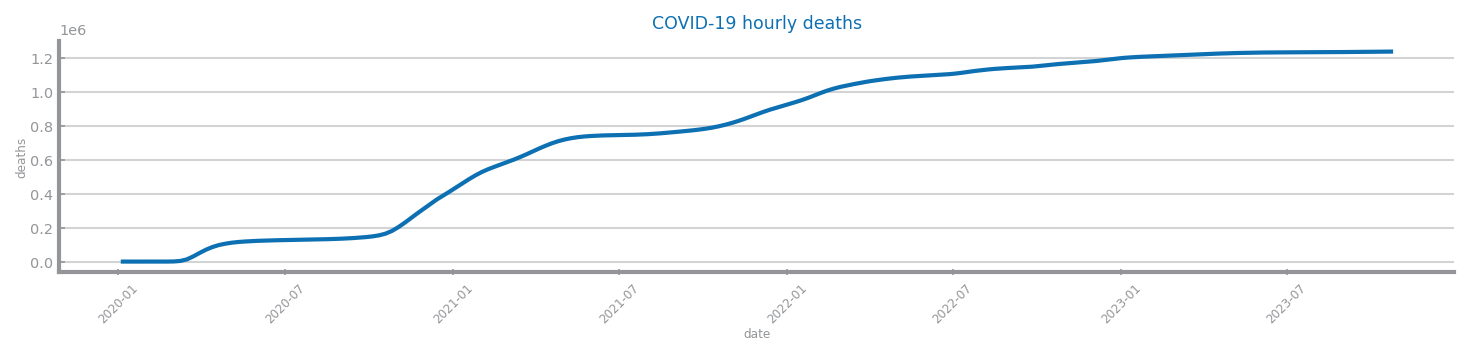

In [2]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, savefig
from dslabs_functions import plot_line_chart, HEIGHT


data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)
show()

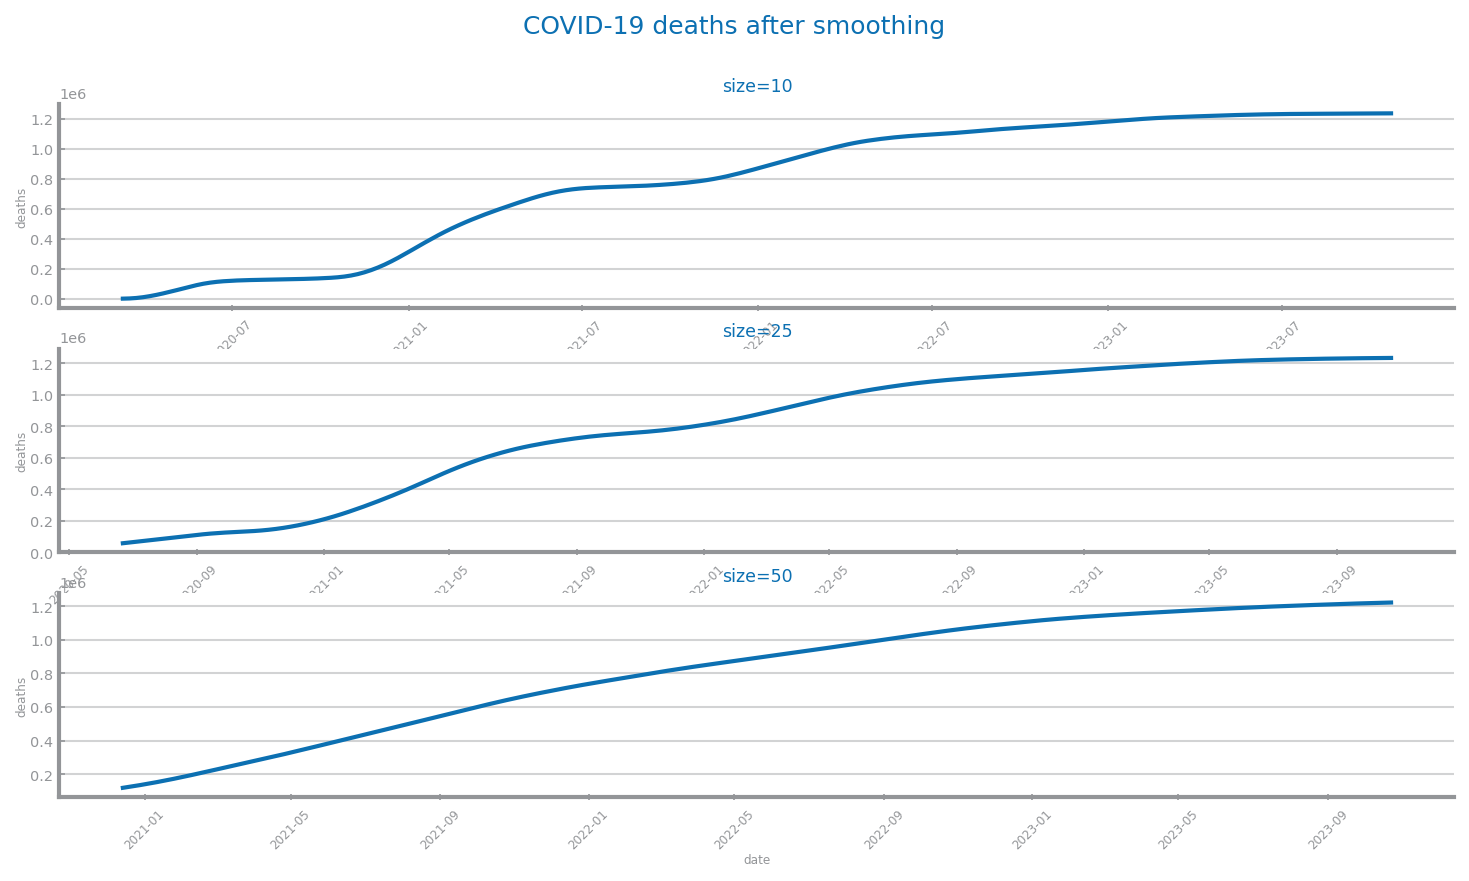

In [3]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

sizes: list[int] = [10, 25, 50]
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} {target} after smoothing")

for i in range(len(sizes)):
    ss_smooth: Series = series.rolling(window=sizes[i]).mean()
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        ax=axs[i],
        xlabel=ss_smooth.index.name,
        ylabel=target,
        title=f"size={sizes[i]}",
    )
# savefig(f"images/{file_tag}_{target}_smoothing_plot.png")
show()

TypeError: plot_forecasting_series() got an unexpected keyword argument 'axs'

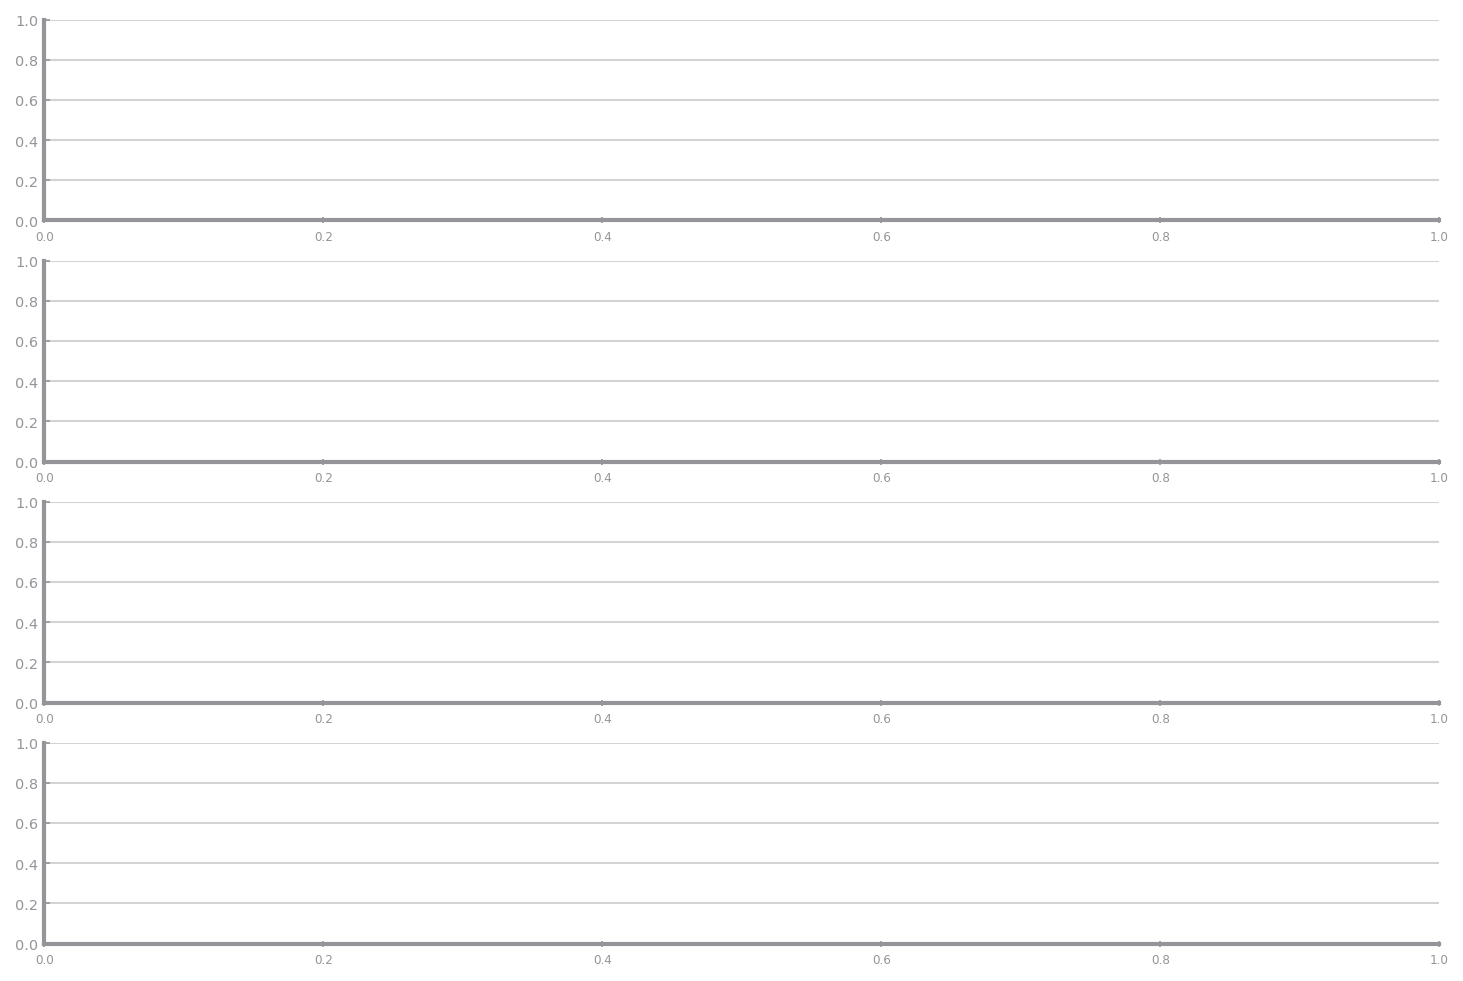

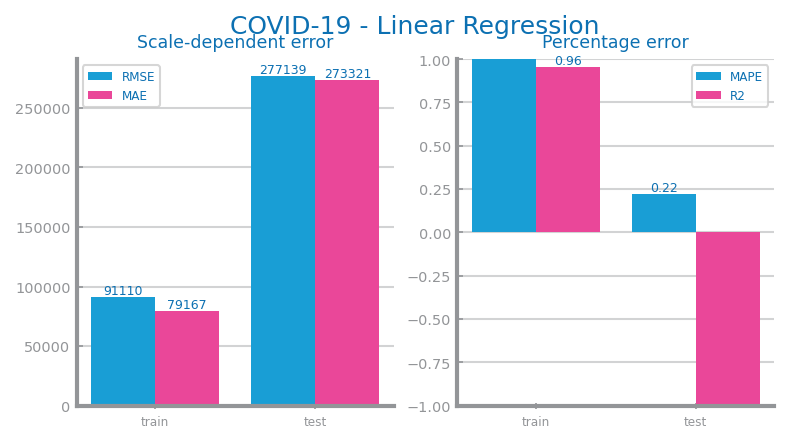

In [26]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split, plot_forecasting_eval, ts_aggregation_by


data: DataFrame = read_csv(filename, index_col=timecol, sep=",", decimal=".", parse_dates=True)
series: Series = data[target]



agg_df = data
window = 25
# agg_df = ts_aggregation_by(data, gran_level="M", agg_func="mean")
# agg_df = agg_df.resample("M").mean()
# agg_df = agg_df.diff()
# agg_df = agg_df.dropna()

list = [10, 25, 50, 100]

fig, axs = subplots(len(list), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(list)))

for window in range(len(list)):

    train, test = series_train_test_split(data, trn_pct=0.90)

    train = train.rolling(window=list[window]).mean()
    train = train.fillna(0, inplace=False)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(data)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
    savefig(f"images/{file_tag}_linear_regression_eval.png")

    from dslabs_functions import plot_forecasting_series

    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag} - Linear Regression",
        xlabel=timecol,
        ylabel=target,
        axs=axs[window],

    )
savefig(f"images/{file_tag}_linear_regression_forecast_{window}.png")

In [10]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split, plot_forecasting_eval, ts_aggregation_by

data: DataFrame = read_csv(filename, index_col=timecol, sep=",", decimal=".", parse_dates=True)
series: Series = data[target]

aggr = 10

# agg_df: DataFrame = ts_aggregation_by(data, gran_level="Q", agg_func="mean")
agg_df = data
agg_df = agg_df.rolling(window=aggr).mean()
# agg_df.fillna(0, inplace=True)
agg_df.dropna(inplace=True)

def bla(agg_df):
    train, test = series_train_test_split(agg_df, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(data)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    return train, test, prd_trn, prd_tst

train, test, prd_trn, prd_tst = bla(agg_df)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
savefig(f"images/{file_tag}_linear_regression_eval_{aggr}.png")

from dslabs_functions import plot_forecasting_series

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"images/{file_tag}_linear_regression_forecast_{aggr}.png")

ValueError: Length of values (28) does not match length of index (19)